# Descriptive Statistics, Correlation, and Simple Linear Regression

These concepts are essential for understanding and interpreting relationships between variables in data analytics and machine learning.

In [44]:
import pandas as pd
import numpy as np

df = pd.read_csv('advertising.csv')

In [45]:
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [47]:
# Calculate basic descriptive statistics for numerical columns
print(df.describe())

               TV       Radio   Newspaper       Sales
count  200.000000  200.000000  200.000000  200.000000
mean   147.042500   23.264000   30.554000   15.130500
std     85.854236   14.846809   21.778621    5.283892
min      0.700000    0.000000    0.300000    1.600000
25%     74.375000    9.975000   12.750000   11.000000
50%    149.750000   22.900000   25.750000   16.000000
75%    218.825000   36.525000   45.100000   19.050000
max    296.400000   49.600000  114.000000   27.000000


In [48]:
# Calculate the mean, median, and mode for specific columns
print("Mean:")
print(df.mean())

Mean:
TV           147.0425
Radio         23.2640
Newspaper     30.5540
Sales         15.1305
dtype: float64


In [49]:
print("Median:")
print(df.median())

Median:
TV           149.75
Radio         22.90
Newspaper     25.75
Sales         16.00
dtype: float64


In [51]:
print("Mode:")
print(df.mode().iloc[0])  # Mode may have multiple values, so we take the first one

Mode:
TV           17.2
Radio         4.1
Newspaper     8.7
Sales        11.9
Name: 0, dtype: float64


In [56]:
# Calculate the variance and standard deviation for specific columns
print("Variance:")
print(df.var())
print("\nStandard Deviation:")
print(df.std())

Variance:
TV           7370.949893
Radio         220.427743
Newspaper     474.308326
Sales          27.919517
dtype: float64

Standard Deviation:
TV           85.854236
Radio        14.846809
Newspaper    21.778621
Sales         5.283892
dtype: float64


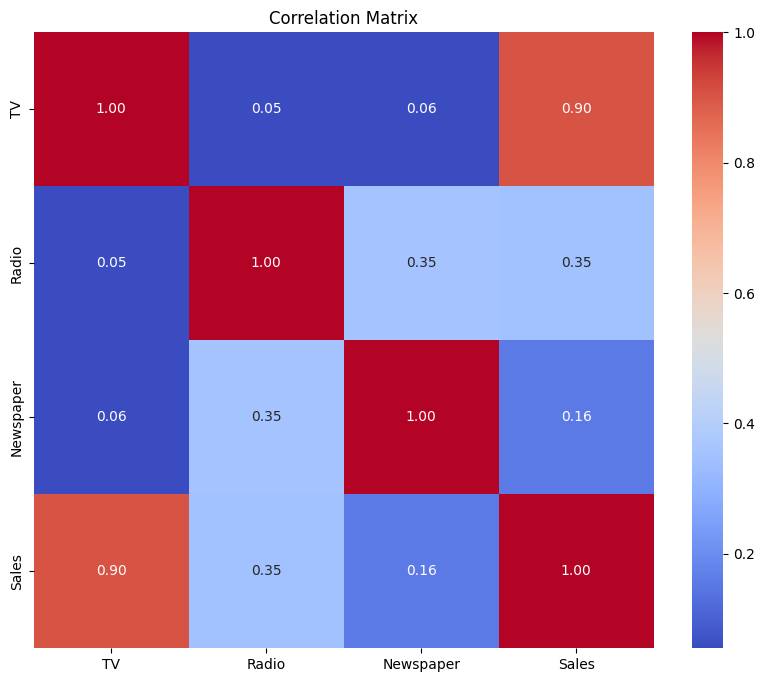

In [57]:
# Calculate the correlation matrix for all numerical columns
correlation_matrix = df.corr()

# Visualize the correlation matrix using a heatmap (using seaborn library)
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


___
### Linear Regression

Data Cleaning 

In [59]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]
# There are no NULL values in the dataset, hence it is clean.

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

/Users/yashkarapurkar/Documents/Projects/IoT lab/Iot_lab/lib/python3.9/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


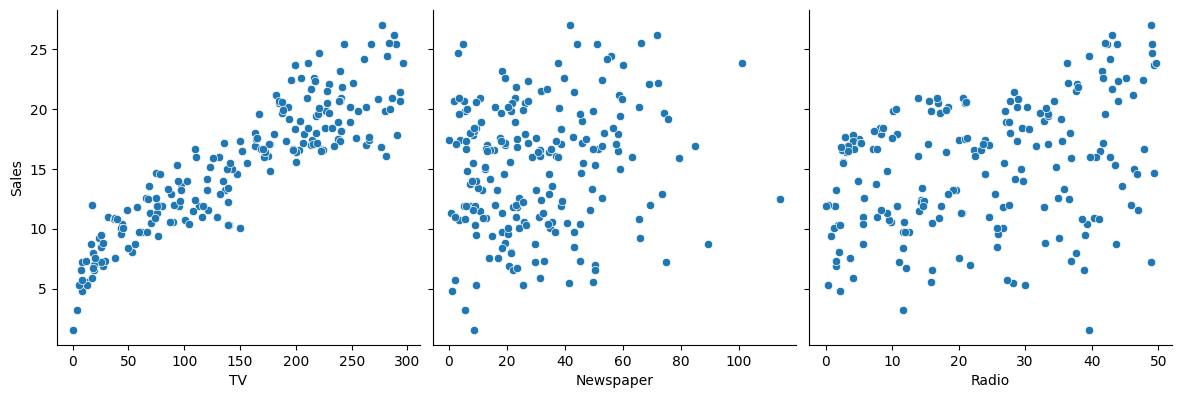

In [62]:
# Let's see how Sales are related with other variables using scatter plot.
sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

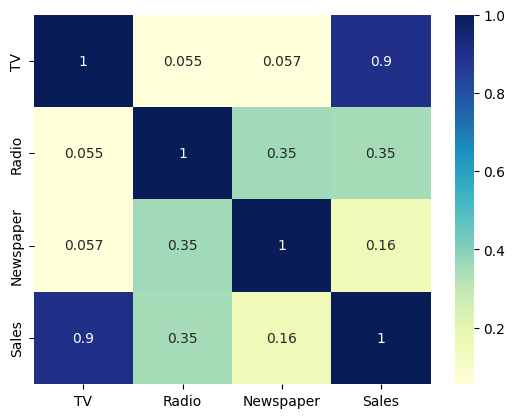

In [64]:
# Let's see the correlation between different variables.
sns.heatmap(df.corr(), cmap="YlGnBu", annot = True)
plt.show()

##### As is visible from the pairplot and the heatmap, the variable TV seems to be most correlated with Sales. So let's go ahead and perform simple linear regression using TV as our feature variable.

___

### Model Building

In [66]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [71]:
# Assuming we want to perform a simple linear regression between 'bmi' and 'target' columns
# Replace 'bmi' and 'target' with appropriate column names
X = df['TV'].values.reshape(-1, 1)
y = df['Sales'].values

# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression object
regressor = LinearRegression()

# Fit the model using the training data
regressor.fit(X_train, y_train)


LinearRegression()

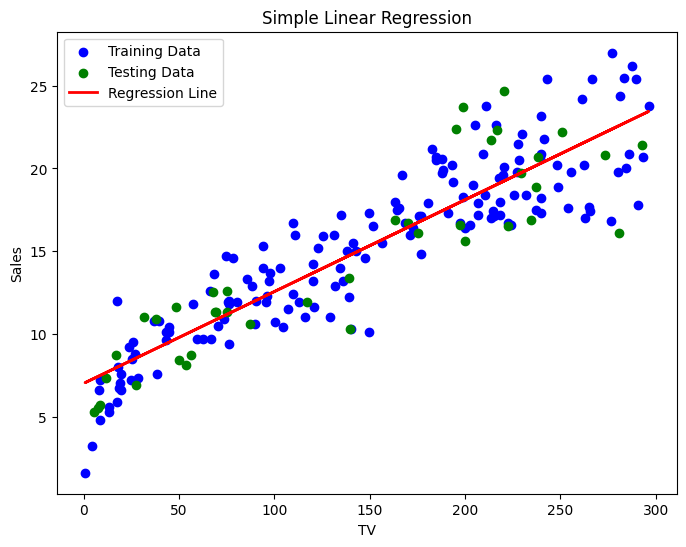

In [72]:
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.scatter(X_test, y_test, color='green', label='Testing Data')

# Regression line
plt.plot(X_train, regressor.predict(X_train), color='red', linewidth=2, label='Regression Line')

plt.xlabel('TV')
plt.ylabel('Sales')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()


In [74]:
from sklearn.metrics import mean_squared_error, r2_score

# Make predictions using the test set
Y_pred = regressor.predict(X_test)

# Calculate Mean Squared Error and R-squared
mse = mean_squared_error(y_test, Y_pred)
r2 = r2_score(y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 6.101072906773963
R-squared: 0.802561303423698
